           ds        y
0  2022-01-01  2872.25
1  2022-02-01  3154.72
2  2022-03-01  3470.95
3  2022-04-01  3245.94
4  2022-05-01  3516.49
    holiday         ds  lower_window  upper_window
0  new_year 2023-01-01             0             1
1       eid 2023-04-22             0             1
2       eid 2024-04-10             0             1


11:07:39 - cmdstanpy - INFO - Chain [1] start processing
11:07:40 - cmdstanpy - INFO - Chain [1] done processing


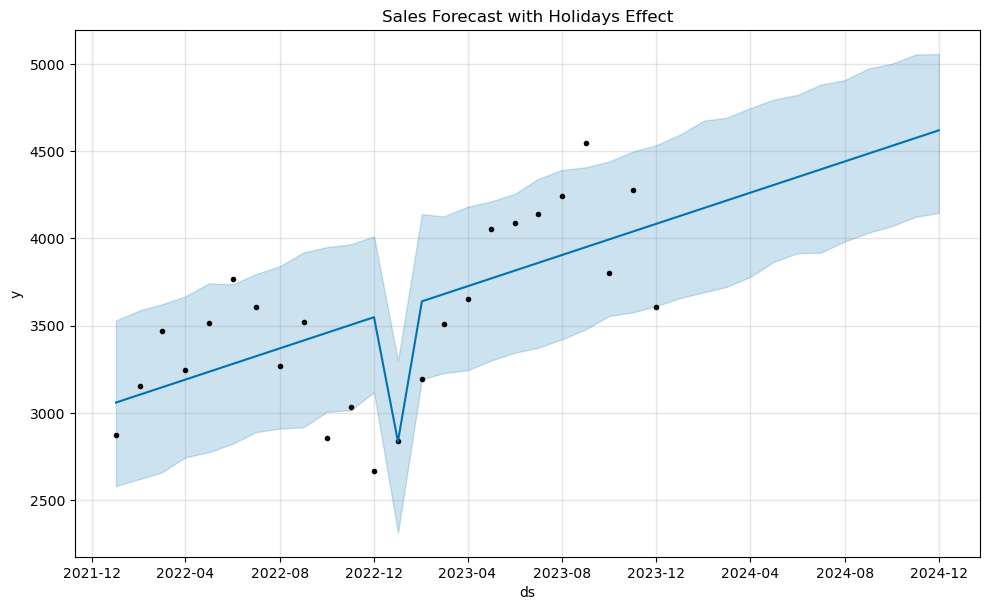

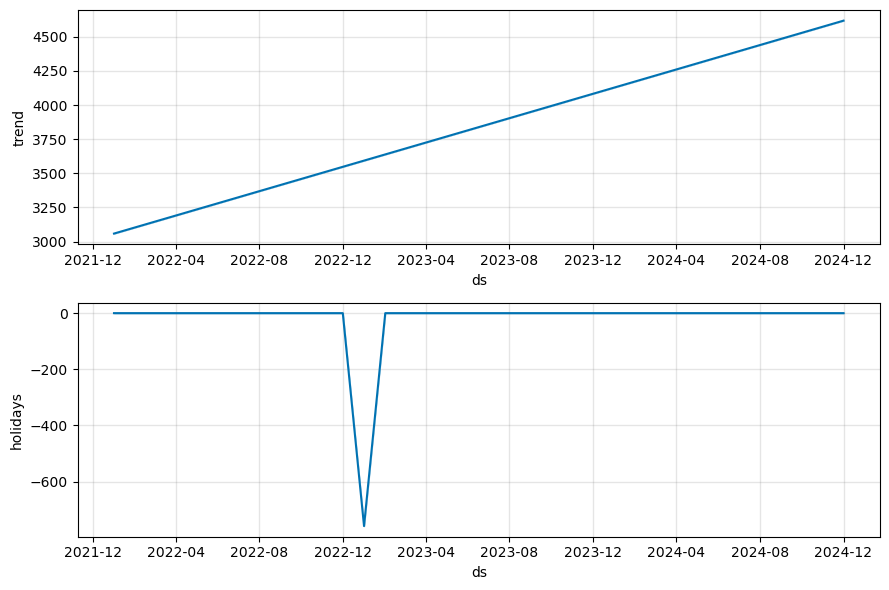

In [1]:
# Step 1: Libraries Import karo
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 2: Monthly Sales data load karo
df = pd.read_csv("monthly_sales.csv")
print(df.head())  # Check data

# Step 3: Holiday/Event list banao
holidays = pd.DataFrame({
    'holiday': ['new_year', 'eid', 'eid'],
    'ds': pd.to_datetime(['2023-01-01', '2023-04-22', '2024-04-10']),
    'lower_window': 0,   # Eid ya New Year ke din effect
    'upper_window': 1    # Aur agle din bhi effect
})

print(holidays)
"""
Prophet ko pata chalta hai ke kuch special days par sales ya output pe effect aata hai

Prophet model trend, seasonality ke sath holidays ka effect bhi learn karta hai

Agar ye line mein holidays=holidays na do, to model ko events ka pata nahi chalega.
"""
# Step 4: Prophet model create karo with holiday information
model = Prophet(holidays=holidays)

# Step 5: Model ko train karo
model.fit(df)
"""
Future mein kitne months ka forecast chahiye (periods=12 ➔ 12 months)

freq='MS' ➔ Month Start frequency (jaise 1 Jan, 1 Feb)
"""

# Step 6: Future dates banao (next 12 months)
future = model.make_future_dataframe(periods=12, freq='MS')

""" Future dataframe ke liye forecast nikal """
# Step 7: Forecast generate karo
forecast = model.predict(future)

# Step 8: Forecast plot karo
model.plot(forecast)
plt.title("Sales Forecast with Holidays Effect")
plt.show()

# Step 9: Trend aur Seasonality Components plot karo
model.plot_components(forecast)
plt.show()
